In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings

In [3]:
df = pd.read_csv('cleaned_data.csv')
df.head()

Company                                          Job title  \
0           DaVita                Senior Legal Counsel - Data Privacy   
1          Catch22        Data Administrator – Contractual Governance   
2  Haver Analytics                              Economic Data Manager   
3    Network Homes  Reports and Data Officer (12 Month Maternity C...   
4      Adeccogroup         Data Visualisation Manager (Hybrid/Remote)   

            Location  Employees  comp_age             Company type  \
0    London, England    10000.0      29.0         Company - Public   
1    London, England     3000.0     235.0  Non-profit Organisation   
2    London, England      125.0      45.0        Company - Private   
3  Hertford, England      750.0       7.0        Company - Private   
4    London, England    10000.0       NaN         Company - Public   

                   Company industry  \
0   Healthcare Services & Hospitals   
1  Civic, Welfare & Social Services   
2               Business Consulting   
3                      Construction   
4                     HR Consulting   

                                Company sector  Career opportunities  \
0                                   Healthcare                   3.4   
1                             Non-profit & NGO                   3.6   
2                      Management & Consulting                   2.7   
3  Construction, Repair & Maintenance Services                   3.5   
4                   Human Resources & Staffing                   3.6   

   Comp & Benefits  ...  STATA_yn  SPSS_yn  spark_yn sql_yn  excel_yn  aws_yn  \
0              3.2  ...         0        0         0      0         1       1   
1              3.1  ...         0        0         0      0         1       0   
2              3.1  ...         0        0         0      0         1       0   
3              3.7  ...         0        0         0      0         1       0   
4              3.3  ...         0        0         0      0         1       0   

   jupyter_yn  description_length  simplified_jobs  seniority_jobs  
0           1                 510       other data             snr  
1           0                 806       other data              jr  
2           0                 270        economist             snr  
3           0                 519       other data             NaN  
4           0                 722       other data             snr  

[5 rows x 30 columns]

In [4]:
# Drop outliers found in eda
df.drop(index=df.salary_thousands[df.salary_thousands<10].index, inplace=True)

In [5]:
len(df)

1842

In [8]:
# Only use sectors that have more than 20 records - this doesnt remove that many <10%
df = df[~df['Company sector'].isin(df['Company sector'].
               value_counts()[df['Company sector'].value_counts()<20].index.tolist())]

In [10]:
len(df)

1710

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710 entries, 0 to 1843
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1710 non-null   object 
 1   Job title             1710 non-null   object 
 2   Location              1692 non-null   object 
 3   Employees             1522 non-null   float64
 4   comp_age              1346 non-null   float64
 5   Company type          1607 non-null   object 
 6   Company industry      1442 non-null   object 
 7   Company sector        1442 non-null   object 
 8   Career opportunities  1447 non-null   float64
 9   Comp & Benefits       1447 non-null   float64
 10  Culture & Values      1447 non-null   float64
 11  Senior Management     1447 non-null   float64
 12  Work/Life Balance     1447 non-null   float64
 13  Description           1710 non-null   object 
 14  comp_rate             1456 non-null   float64
 15  em_provided_est      

In [12]:
df.describe()

Employees     comp_age  Career opportunities  Comp & Benefits  \
count   1522.000000  1346.000000           1447.000000      1447.000000   
mean    3578.449409    57.393016              3.720111         3.678784   
std     4233.341343    71.453081              0.511841         0.531171   
min       25.000000     1.000000              1.000000         1.000000   
25%       25.000000    10.000000              3.500000         3.400000   
50%      750.000000    26.000000              3.700000         3.700000   
75%    10000.000000    65.000000              4.000000         4.000000   
max    10000.000000   333.000000              5.000000         5.000000   

       Culture & Values  Senior Management  Work/Life Balance    comp_rate  \
count       1447.000000        1447.000000        1447.000000  1456.000000   
mean           3.863649           3.618106           3.725225     3.907486   
std            0.520286           0.573978           0.548864     0.468784   
min            1.000000           1.000000           1.000000     1.000000   
25%            3.600000           3.300000           3.400000     3.700000   
50%            3.900000           3.600000           3.800000     3.900000   
75%            4.100000           3.900000           4.100000     4.200000   
max            5.000000           5.000000           5.000000     5.000000   

       em_provided_est  salary_thousands  ...    python_yn         R_yn  \
count      1710.000000       1710.000000  ...  1710.000000  1710.000000   
mean          0.564912         61.663085  ...     0.466082     0.073099   
std           0.495914         31.529341  ...     0.498994     0.260376   
min           0.000000         18.000000  ...     0.000000     0.000000   
25%           0.000000         42.454750  ...     0.000000     0.000000   
50%           1.000000         57.500000  ...     0.000000     0.000000   
75%           1.000000         66.500000  ...     1.000000     0.000000   
max           1.000000        300.000000  ...     1.000000     1.000000   

          STATA_yn      SPSS_yn     spark_yn       sql_yn     excel_yn  \
count  1710.000000  1710.000000  1710.000000  1710.000000  1710.000000   
mean      0.005848     0.007602     0.059064     0.367836     0.560819   
std       0.076270     0.086885     0.235814     0.482358     0.496432   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     1.000000   
75%       0.000000     0.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            aws_yn   jupyter_yn  description_length  
count  1710.000000  1710.000000         1710.000000  
mean      0.154971     0.154971          583.388304  
std       0.361983     0.361983          308.982475  
min       0.000000     0.000000           22.000000  
25%       0.000000     0.000000          330.000000  
50%       0.000000     0.000000          552.000000  
75%       0.000000     0.000000          775.000000  
max       1.000000     1.000000         3294.000000  

[8 rows x 21 columns]

<AxesSubplot:>

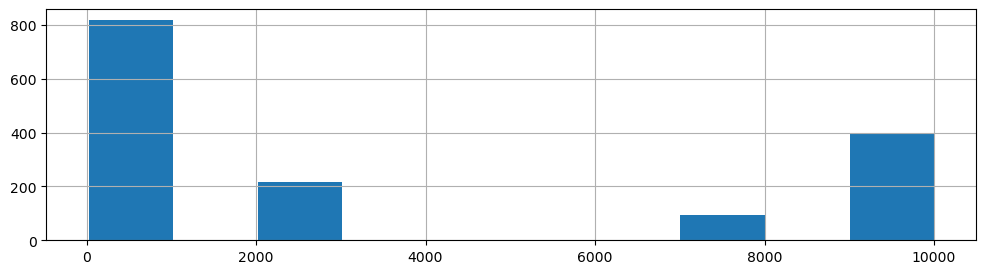

In [13]:
df['Employees'].hist(figsize=(12,3))

<AxesSubplot:>

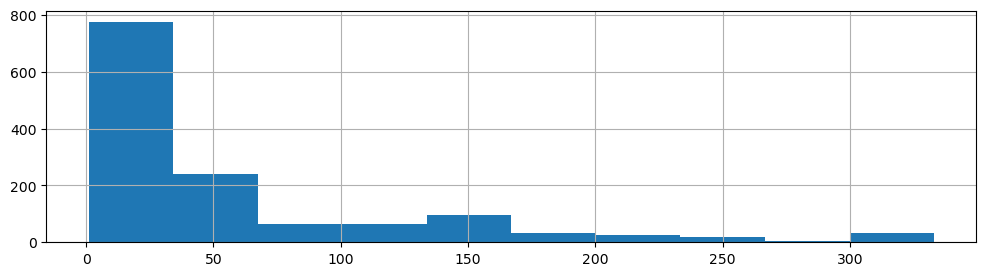

In [14]:
df['comp_age'].hist(figsize=(12,3))

In [15]:
df['salary_thousands'].value_counts().sort_index(ascending=False)

300.0000     1
243.7500     1
188.9160     1
182.8125     1
175.5000     1
            ..
24.0000      1
23.4000      2
23.3770      1
23.1660      1
18.0000     28
Name: salary_thousands, Length: 272, dtype: int64

<AxesSubplot:>

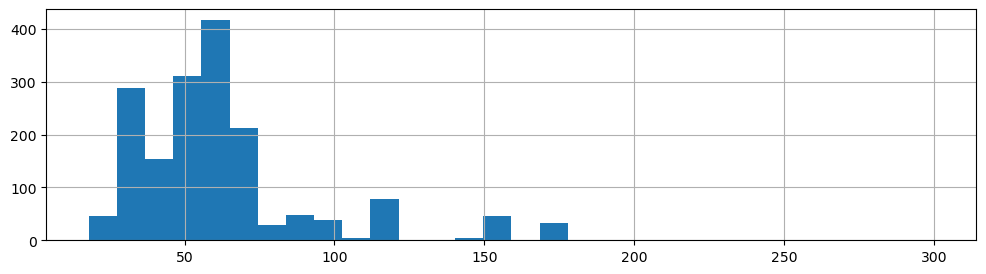

In [16]:
df['salary_thousands'].hist(figsize=(12,3), bins=30)

In [17]:
df['revenue'][df['revenue']>0].value_counts().sort_index()

1.0         24
3.0         32
15.0        75
37.0        79
300.0       71
750.0       59
3000.0     136
7000.0      40
10000.0    270
Name: revenue, dtype: int64

<AxesSubplot:>

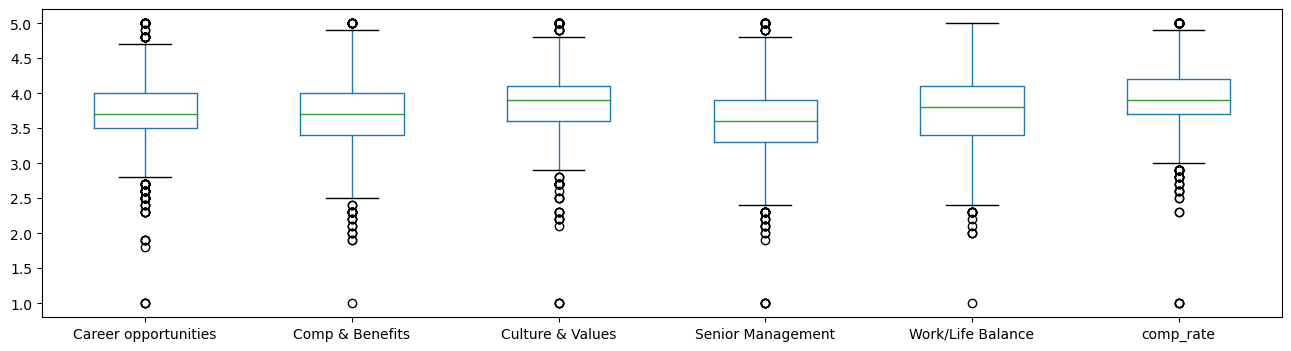

In [18]:
df.boxplot(grid=False,figsize=(16,4), column= ['Career opportunities','Comp & Benefits','Culture & Values','Senior Management','Work/Life Balance','comp_rate'])

<AxesSubplot:>

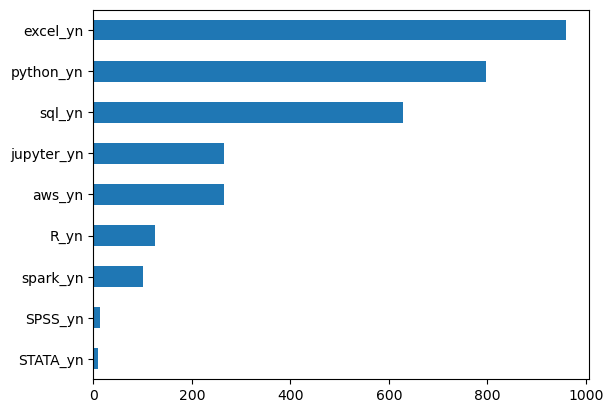

In [19]:
(df[['python_yn','R_yn','STATA_yn','SPSS_yn','spark_yn','sql_yn','excel_yn','aws_yn','jupyter_yn']].sum().sort_values()).plot(kind='barh')

<AxesSubplot:>

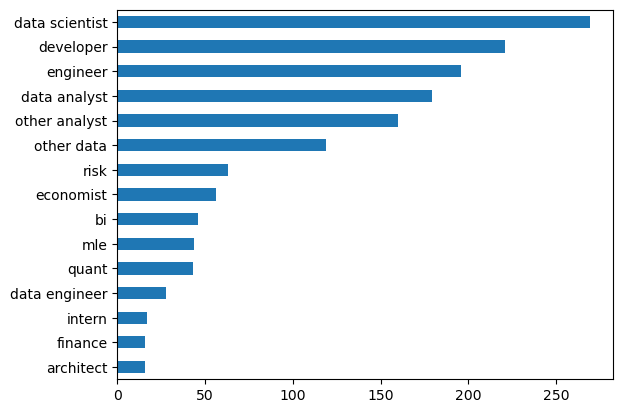

In [20]:
df['simplified_jobs'].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

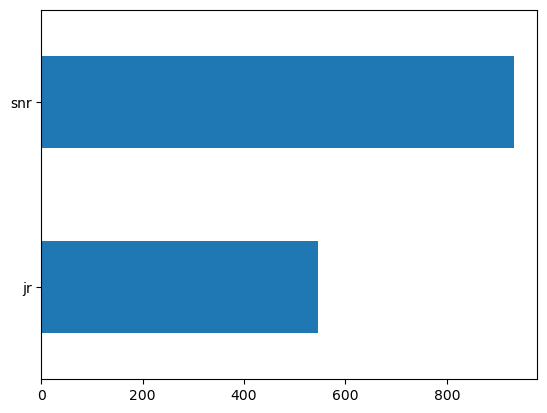

In [21]:
df['seniority_jobs'].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

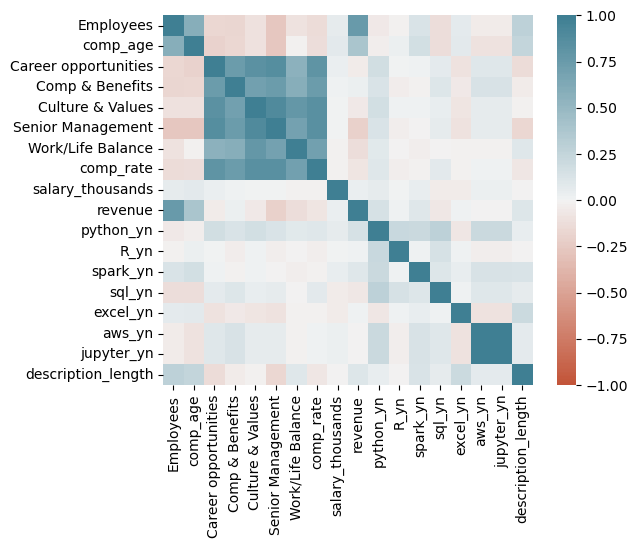

In [22]:
sns.heatmap(
    df.drop(columns=['em_provided_est','STATA_yn','SPSS_yn']).corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

# Pivot tables

In [23]:
df.simplified_jobs.value_counts()

data scientist    269
developer         221
engineer          196
data analyst      179
other analyst     160
other data        119
risk               63
economist          56
bi                 46
mle                44
quant              43
data engineer      28
intern             17
architect          16
finance            16
Name: simplified_jobs, dtype: int64

In [24]:
pd.pivot_table(df, index = ['seniority_jobs'], values= 'salary_thousands')

salary_thousands
seniority_jobs                  
jr                     57.067744
snr                    63.661842

In [25]:
pd.pivot_table(df, index = ['simplified_jobs'], values= 'salary_thousands').reindex().sort_values(by='salary_thousands',ascending=False)

salary_thousands
simplified_jobs                  
intern                  87.893176
economist               86.732196
architect               81.192125
developer               73.394554
data engineer           71.186250
finance                 69.849250
mle                     65.703000
quant                   64.610930
risk                    62.292333
data scientist          62.009714
bi                      59.826217
engineer                58.344324
other data              57.126000
data analyst            56.960310
other analyst           54.757572

In [26]:
pd.pivot_table(df, index = ['simplified_jobs','seniority_jobs'], values= 'salary_thousands')

salary_thousands
simplified_jobs seniority_jobs                  
architect       snr                    81.192125
bi              jr                     57.840300
                snr                    61.353846
data analyst    jr                     57.175396
                snr                    55.342048
data engineer   snr                    71.186250
data scientist  jr                     53.623025
                snr                    61.428877
developer       snr                    73.394554
economist       jr                     85.363636
                snr                    69.057895
engineer        jr                     44.344500
                snr                    59.729743
finance         jr                     83.625000
                snr                    60.717600
intern          jr                     95.084571
                snr                    54.333333
mle             jr                     50.000000
                snr                    69.862154
other analyst   jr                     54.255379
                snr                    56.766344
other data      jr                     53.345803
                snr                    67.487150
quant           jr                     60.207259
risk            jr                     61.686182
                snr                    60.506067

In [27]:
# Check to see why interns are paid so much
#df[df['simplified_jobs']=='intern'].drop(columns=df.columns[8:16]).drop(columns=df.columns[18:27])

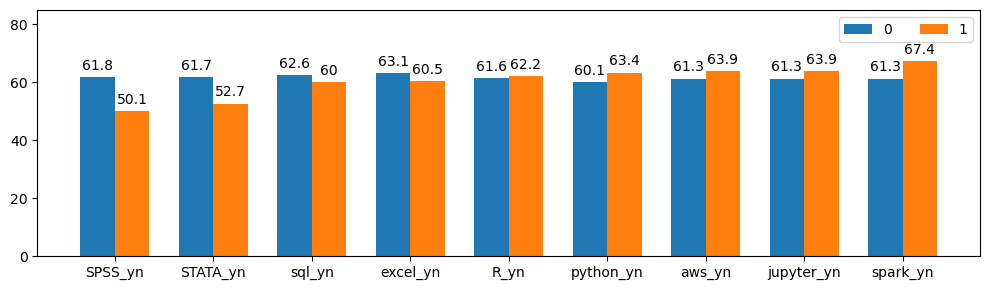

In [28]:
skills = pd.DataFrame()#pd.pivot_table(df, index='python_yn', values='salary_thousands').rename(columns={'salary_thousands':'python_yn'}).rename_axis(None)
for i in df.columns[18:27]:
    skills[i] = pd.pivot_table(df, index=i, values='salary_thousands').rename(columns={'salary_thousands':i}).rename_axis(None)
skills = skills.sort_values(axis=1,by=1).round(1)
fig, ax = plt.subplots(figsize=(10,3))
width = 0.35
x = np.arange(len(skills.columns))
rects1 = ax.bar(x - width/2, skills.iloc[0].values, width, label='0')
rects2 = ax.bar(x + width/2, skills.iloc[1].values, width, label='1')

ax.legend(ncol=2)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.set_ylim(top=85)
ax.set_xticks(x, skills.columns)
fig.tight_layout()

plt.show()

In [29]:
skills.iloc[0].values

array([61.8, 61.7, 62.6, 63.1, 61.6, 60.1, 61.3, 61.3, 61.3])

In [30]:
df['Company type'].value_counts()

Company - Private                 932
Company - Public                  552
Government                         37
Subsidiary or Business Segment     34
Non-profit Organisation            27
Self-employed                       7
Private Practice / Firm             6
Unknown                             5
College / University                3
Contract                            3
Hospital                            1
Name: Company type, dtype: int64

In [31]:
pd.pivot_table(df, index='Company type', values='salary_thousands').sort_values(by='salary_thousands', ascending=False)

salary_thousands
Company type                                    
Private Practice / Firm               100.098333
Self-employed                          90.857143
Company - Public                       65.522391
Subsidiary or Business Segment         61.174735
Company - Private                      59.730153
Contract                               58.500000
Non-profit Organisation                56.621889
Government                             53.489595
Unknown                                52.062400
College / University                   45.852000
Hospital                               44.207000

In [32]:
pd.pivot_table(df[~df['Company industry'].isin(df['Company industry'].
               value_counts()[df['Company industry'].value_counts()<20].index.tolist())],
               index='Company industry', values='salary_thousands').sort_values(by='salary_thousands', ascending=False)

salary_thousands
Company industry                                         
Research & Development                          76.752174
Banking & Lending                               72.795740
Accounting & Tax                                67.655417
Investment & Asset Management                   66.438035
Department, Clothing & Shoe Stores              64.069667
HR Consulting                                   62.709919
Insurance Carriers                              61.752608
Energy & Utilities                              61.657206
Financial Transaction Processing                61.647976
Information Technology Support Services         61.167586
Computer Hardware Development                   60.873857
Security & Protective                           59.803237
Healthcare Services & Hospitals                 59.479311
Internet & Web Services                         59.183783
Publishing                                      58.242048
Business Consulting                             58.115997
Stock Exchanges                                 56.053349
Broadcast Media                                 44.894227

In [33]:
pd.pivot_table(df[~df['Company sector'].isin(df['Company sector'].
               value_counts()[df['Company sector'].value_counts()<20].index.tolist())],
               index='Company sector', values='salary_thousands').sort_values(by='salary_thousands', ascending=False)

salary_thousands
Company sector                                      
Finance                                    66.506738
Human Resources & Staffing                 63.083364
Energy, Mining, Utilities                  62.021937
Information Technology                     61.491140
Retail & Wholesale                         60.891831
Insurance                                  60.199702
Management & Consulting                    59.716533
Healthcare                                 59.479311
Media & Communication                      59.145882
Arts, Entertainment & Recreation           58.664087
Manufacturing                              49.921348
Government & Public Administration         48.206810

In [34]:
df.columns

Index(['Company', 'Job title', 'Location', 'Employees', 'comp_age',
       'Company type', 'Company industry', 'Company sector',
       'Career opportunities', 'Comp & Benefits', 'Culture & Values',
       'Senior Management', 'Work/Life Balance', 'Description', 'comp_rate',
       'em_provided_est', 'salary_thousands', 'revenue', 'python_yn', 'R_yn',
       'STATA_yn', 'SPSS_yn', 'spark_yn', 'sql_yn', 'excel_yn', 'aws_yn',
       'jupyter_yn', 'description_length', 'simplified_jobs',
       'seniority_jobs'],
      dtype='object')

In [35]:
pd.pivot_table(df[df['simplified_jobs']=='risk'], index='seniority_jobs', values='salary_thousands').sort_values(by='salary_thousands', ascending=False)

salary_thousands
seniority_jobs                  
jr                     61.686182
snr                    60.506067

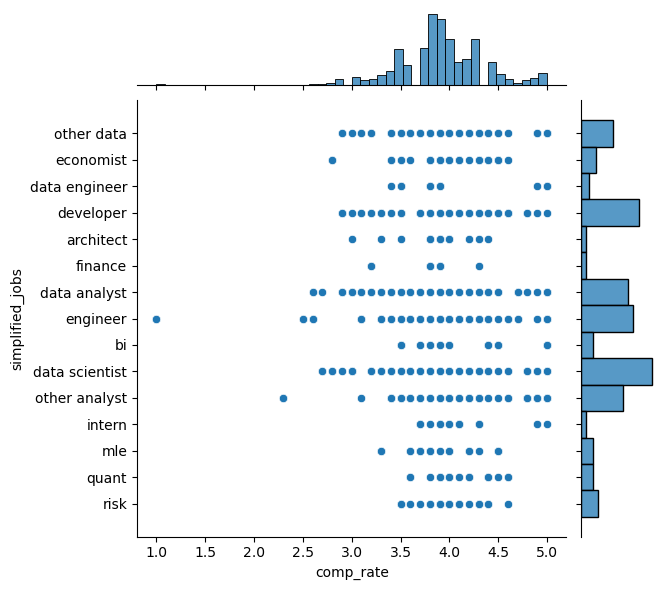

In [36]:
sns.jointplot(data=df, y='simplified_jobs', x='comp_rate')

<AxesSubplot:ylabel='simplified_jobs'>

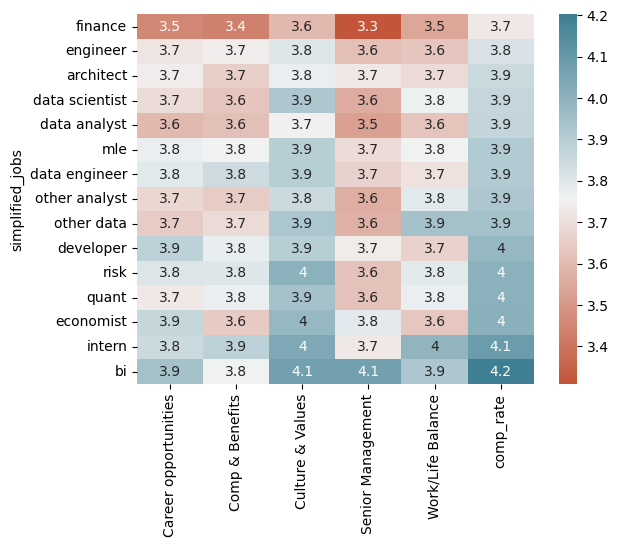

In [51]:
jobs_rank_comp = pd.pivot_table(df[['simplified_jobs','Career opportunities','Comp & Benefits','Culture & Values',
       'Senior Management', 'Work/Life Balance','comp_rate']], index='simplified_jobs', values=['Career opportunities','Comp & Benefits','Culture & Values',
       'Senior Management', 'Work/Life Balance','comp_rate']).sort_values(by='comp_rate')
sns.heatmap(jobs_rank_comp, cmap=sns.diverging_palette(20, 220, n=200), annot=True)

In [45]:
a = px.line_polar(jobs_rank_comp.loc['data scientist'], r=jobs_rank_comp.loc['data scientist'].values, theta=jobs_rank_comp.loc['data scientist'].index, line_close=True, range_r=[0,5]).update_layout(
    autosize=False,
    width=400,
    height=400, title_text='data scientist', title_x =0.5)
a

C:\Users\44756\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])


In [59]:
b = px.line_polar(jobs_rank_comp.loc['data analyst'], r=jobs_rank_comp.loc['data analyst'].values, theta=jobs_rank_comp.loc['data analyst'].index, line_close=True, range_r=[0,5]).update_layout(
    autosize=False,
    width=400,
    height=400, title_text='data analyst', title_x =0.5)
b

C:\Users\44756\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



graph for simplified_jobs: total = 15


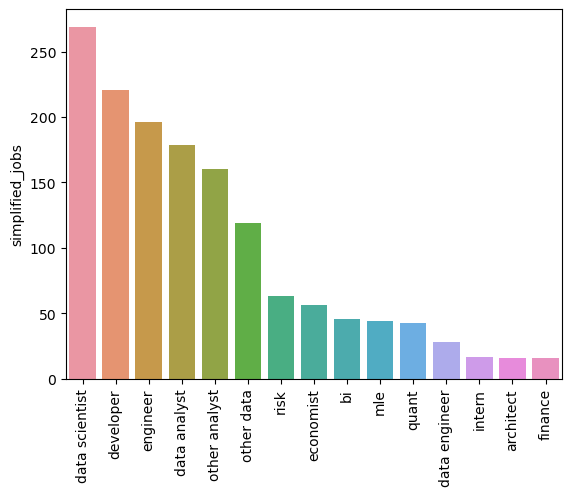

graph for seniority_jobs: total = 2


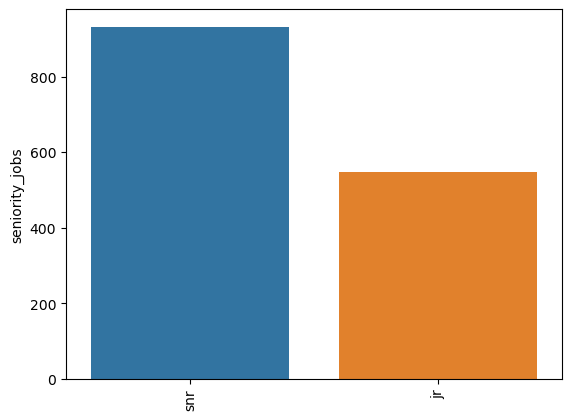

graph for Company type: total = 11


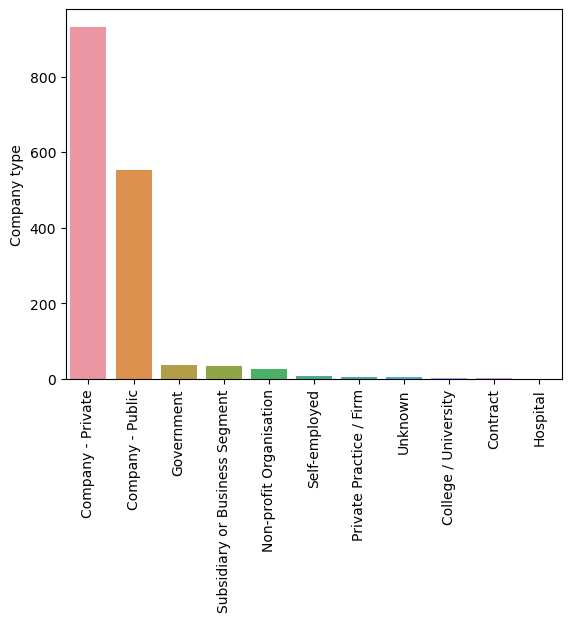

graph for Company industry: total = 47


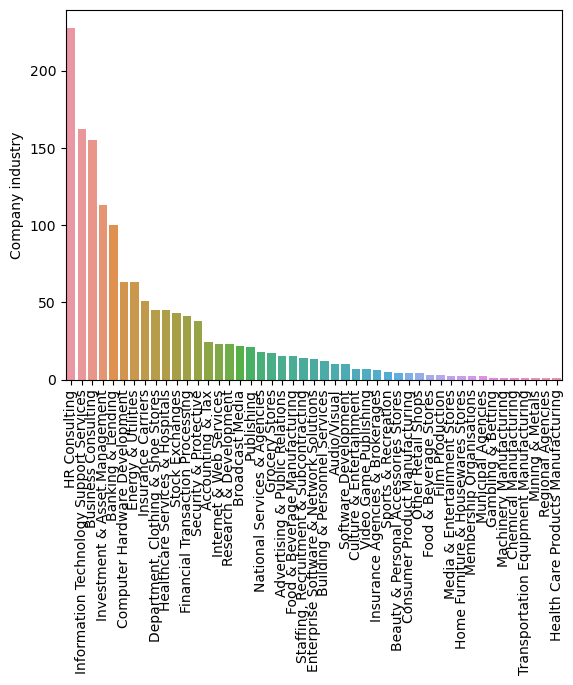

graph for Company sector: total = 12


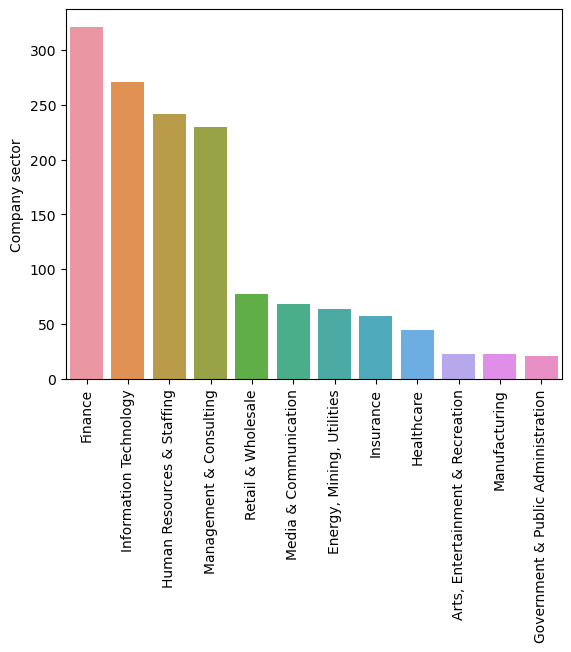

graph for Employees: total = 7


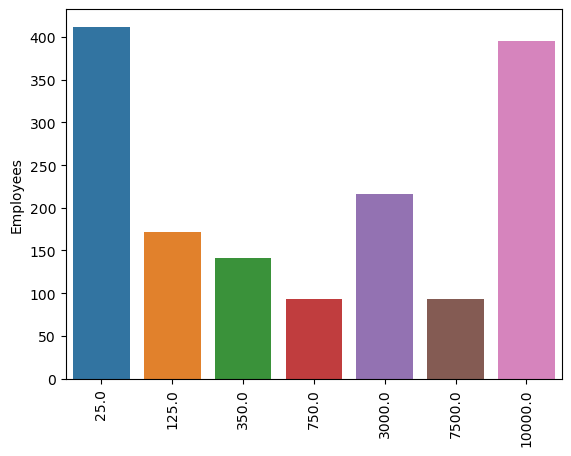

graph for python_yn: total = 2


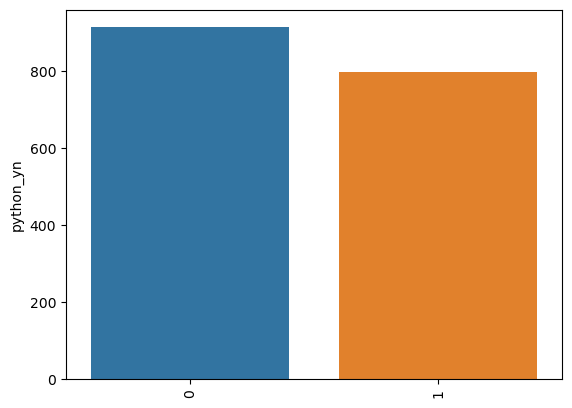

graph for sql_yn: total = 2


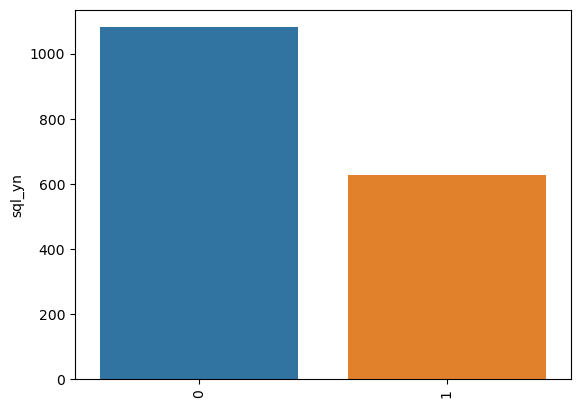

graph for aws_yn: total = 2


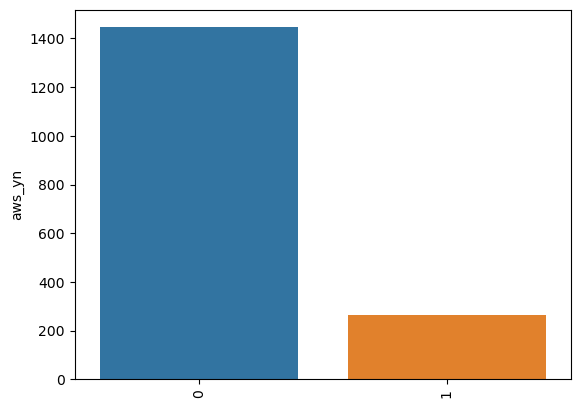

graph for jupyter_yn: total = 2


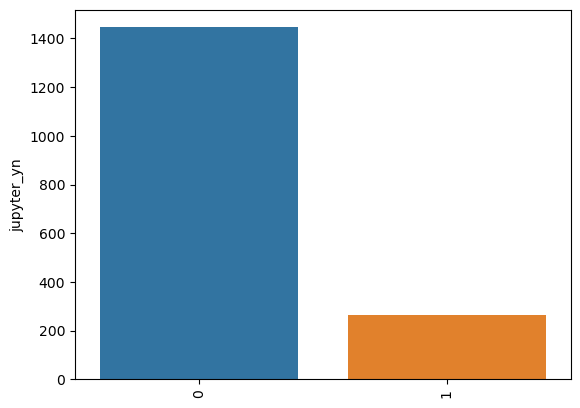

graph for excel_yn: total = 2


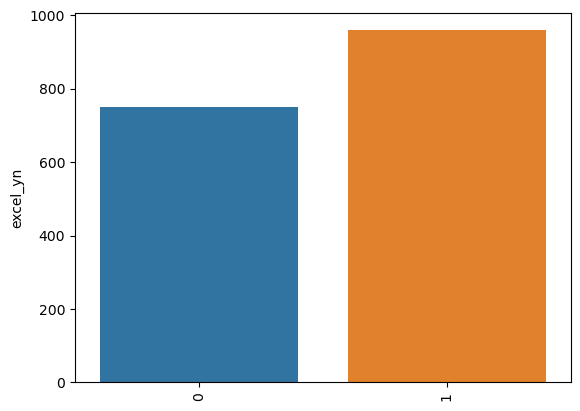

In [39]:
df_cat = df[['simplified_jobs','seniority_jobs','Company type','Company industry','Company sector','Employees','python_yn','sql_yn','aws_yn','jupyter_yn','excel_yn']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

# Word Cloud

In [568]:
import nltk
nltk.download('punkt')
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\44756\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


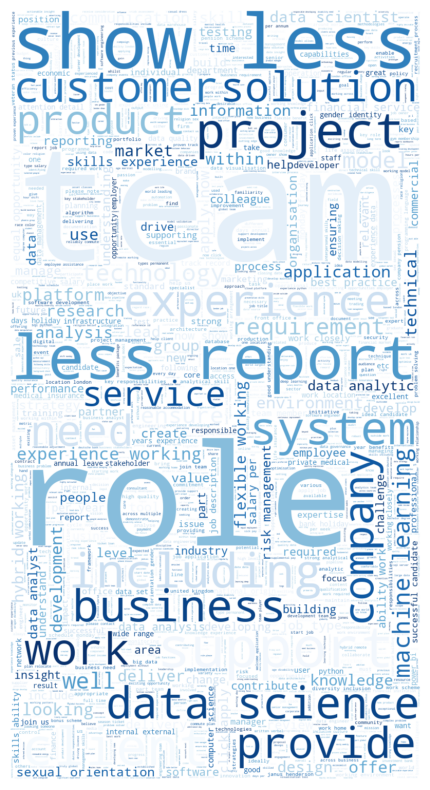

In [570]:
words = " ".join(df['Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white",colormap="Blues", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

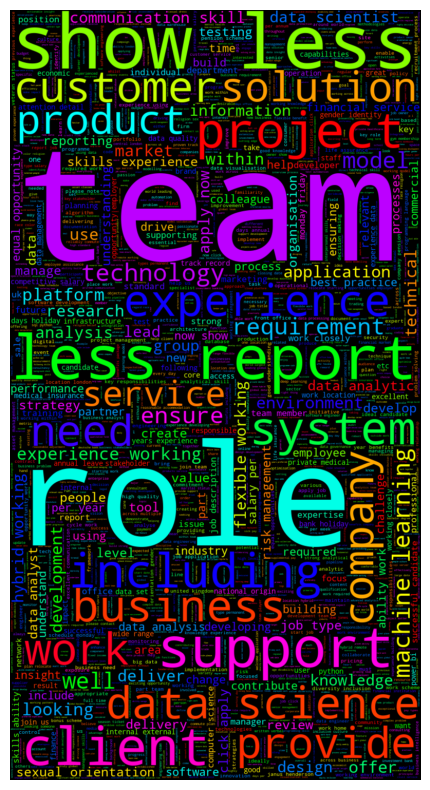

In [571]:
words = " ".join(df['Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="black",colormap="gist_rainbow_r", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()